In [1]:
import pandas as pd
import os
import re

density_list = ['고밀도', '중밀도', '저밀도']
speed_list = ['고속', '중속', '저속']
mode_list = ['기존', '제안']

node_dict = {
    '고밀도': {
        '고속': [0, 4, 6, 7, 9, 10, 11, 17, 19, 20],
        '중속': [0, 4, 6, 7, 9, 10, 11, 17, 19, 20],
        '저속': [0, 4, 6, 7, 9, 10, 11, 17, 19, 20],
    },
    '중밀도': {
        '고속': [6, 7, 17, 18, 21, 22, 24, 26, 27, 29],
        '중속': [6, 7, 17, 18, 21, 22, 24, 26, 27, 29],
        '저속': [6, 7, 17, 18, 21, 22, 24, 26, 27, 29],
    },
    '저밀도': {
        '고속': [6, 7, 17, 18, 19, 21, 22, 24, 25, 26],
        '중속': [6, 7, 17, 18, 19, 21, 22, 24, 25, 26],
        '저속': [6, 7, 17, 18, 19, 21, 22, 24, 25, 26],
    }
}


data = []

for density in density_list:
    for speed in speed_list:
        for mode in mode_list:
            base_path = f"C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/{density}/{speed}/{mode}/"
            
            nodes = node_dict[density][speed]

            for node_id in nodes:
                file_path = os.path.join(base_path, str(node_id), "aodv_routing_log.csv")

                print(f"로딩 중: {file_path}")

                if not os.path.exists(file_path):
                    print(f"파일 없음: {file_path}")
                    continue

                try:
                    df = pd.read_csv(file_path, nrows=500)
                except Exception as e:
                    print(f"파일 로딩 실패: {file_path}, 에러: {e}")
                    continue

                def extract_node(x):
                    match = re.search(r'\[(\d+)\]', str(x))
                    return int(match.group(1)) if match else -1

                if 'Node' in df.columns:
                    df['Node'] = df['Node'].apply(extract_node)

                if 'New_LifeTime' in df.columns and 'Previous_LifeTime' in df.columns:
                    df['LifeTime_Change'] = df['New_LifeTime'] - df['Previous_LifeTime']
                else:
                    print(f"LifeTime 컬럼 없음: {file_path}")
                    continue

                for row in df.itertuples(index=False):
                    data.append([density, speed, mode, node_id, row.New_LifeTime, row.LifeTime_Change])

df_result = pd.DataFrame(data, columns=['Density', 'Speed', 'Method', 'Node', 'LifeTime', 'LifeTime_Change'])

print("데이터 로딩 완료")

로딩 중: C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/고밀도/고속/기존/0\aodv_routing_log.csv
로딩 중: C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/고밀도/고속/기존/4\aodv_routing_log.csv
로딩 중: C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/고밀도/고속/기존/6\aodv_routing_log.csv
로딩 중: C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/고밀도/고속/기존/7\aodv_routing_log.csv
로딩 중: C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/고밀도/고속/기존/9\aodv_routing_log.csv
로딩 중: C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/고밀도/고속/기존/10\aodv_routing_log.csv
로딩 중: C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/고밀도/고속/기존/11\aodv_routing_log.csv
로딩 중: C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/고밀도/고속/기존/17\aodv_routing_log.csv
로딩 중: C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/고밀도/고속/기존/19\aodv_rout

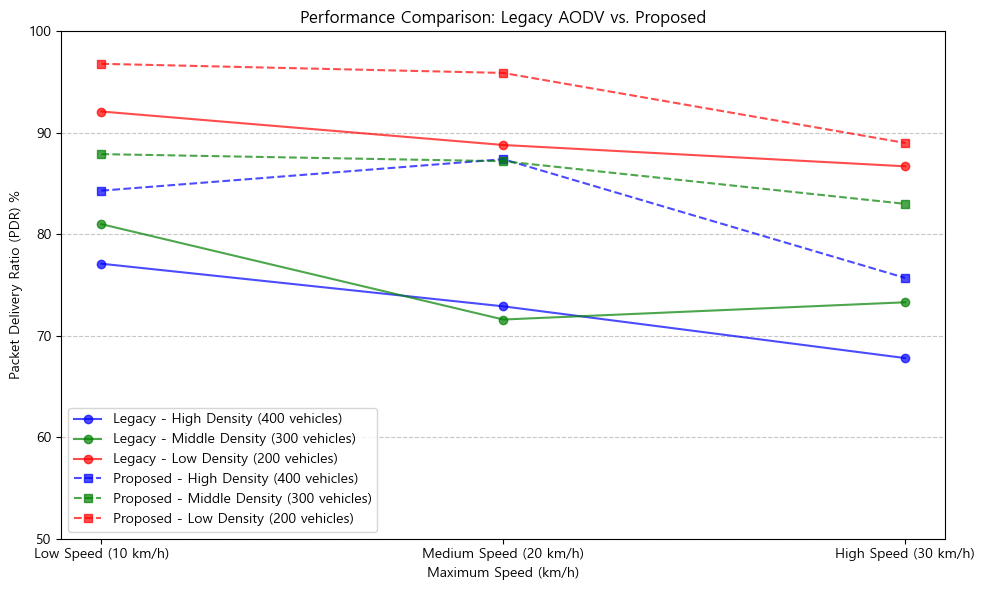

In [3]:
import matplotlib.pyplot as plt
import numpy as np

categories = ['Low Speed (10 km/h)', 'Medium Speed (20 km/h)', 'High Speed (30 km/h)']
density_levels = ['High Density (400 vehicles)', 'Middle Density (300 vehicles)', 'Low Density (200 vehicles)']

existing = np.array([
    [77.1, 72.9, 67.8],
    [81.0, 71.6, 73.3],
    [92.1, 88.8, 86.7]
])

proposed = np.array([
    [84.3, 87.4, 75.7],
    [87.9, 87.2, 83.0],
    [96.8, 95.9, 89.0]
])

plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red']

for i, level in enumerate(density_levels):
    plt.plot(categories, existing[i], marker='o', linestyle='-', color=colors[i], 
             label=f'Legacy - {level}', alpha=0.7)

for i, level in enumerate(density_levels):
    plt.plot(categories, proposed[i], marker='s', linestyle='--', color=colors[i], 
             label=f'Proposed - {level}', alpha=0.7)

plt.xlabel('Maximum Speed (km/h)')
plt.ylabel('Packet Delivery Ratio (PDR) %')
plt.title('Performance Comparison: Legacy AODV vs. Proposed')
plt.ylim(50, 100)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


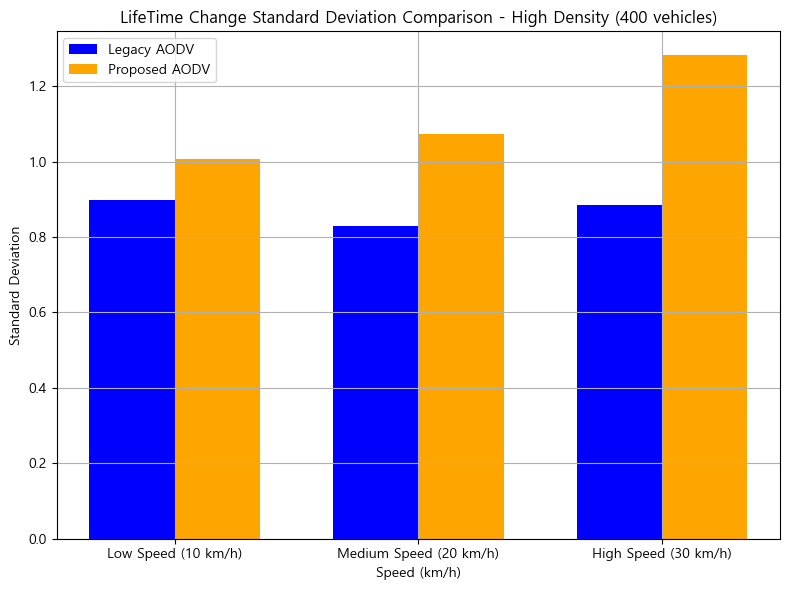

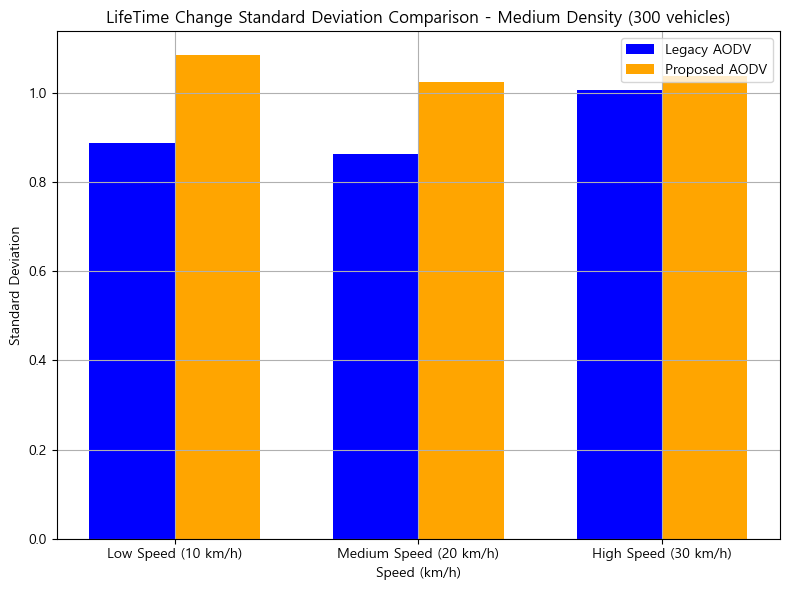

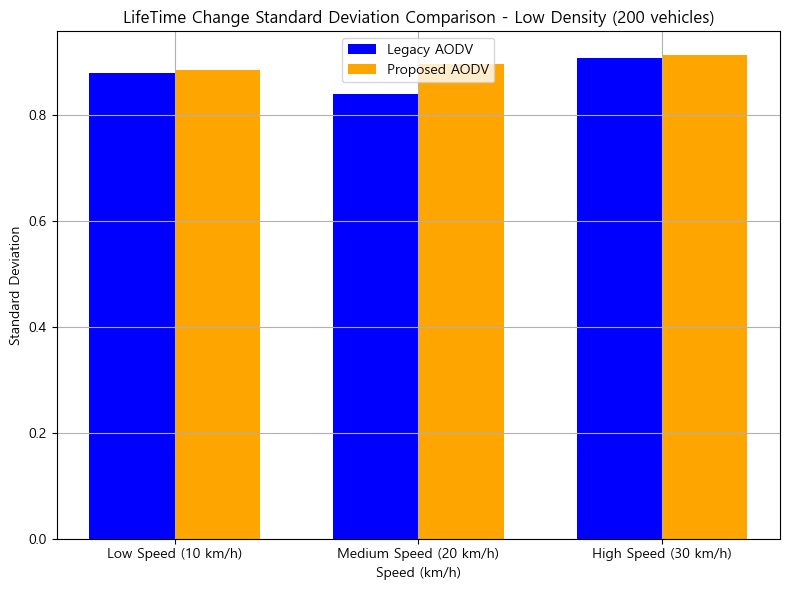

In [16]:
import matplotlib.pyplot as plt
import numpy as np

import platform
from matplotlib import font_manager, rc

# 한글 폰트 설정 (Windows 한정)
if platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')

# 밀도, 속도 영어 번역
density_translation = {
    "고밀도": "High Density (400 vehicles)",
    "중밀도": "Medium Density (300 vehicles)",
    "저밀도": "Low Density (200 vehicles)"
}

speed_translation = {
    "고속": "High Speed (30 km/h)",
    "중속": "Medium Speed (20 km/h)",
    "저속": "Low Speed (10 km/h)"
}

# 원하는 속도 순서
speed_order = ['저속', '중속', '고속']

# 밀도별로 반복
for density in density_list:
    labels = []
    proposed_std = []
    legacy_std = []

    for speed in speed_order:
        df_filtered = df_result[(df_result['Density'] == density) & (df_result['Speed'] == speed)]
        df_proposed = df_filtered[df_filtered['Method'] == '제안']
        df_legacy = df_filtered[df_filtered['Method'] == '기존']

        if df_proposed.empty or df_legacy.empty:
            continue

        proposed_std.append(df_proposed['LifeTime_Change'].std())
        legacy_std.append(df_legacy['LifeTime_Change'].std())

        labels.append(speed_translation.get(speed, speed))

    # x축 인덱스 및 막대 너비
    x = np.arange(len(labels))
    width = 0.35

    # 그래프 그리기
    plt.figure(figsize=(8, 6))
    plt.bar(x - width/2, legacy_std, width, label='Legacy AODV', color='blue')
    plt.bar(x + width/2, proposed_std, width, label='Proposed AODV', color='orange')

    plt.xlabel('Speed (km/h)')
    plt.ylabel('Standard Deviation')

    density_english = density_translation.get(density, "Unknown Density")
    plt.title(f'LifeTime Change Standard Deviation Comparison - {density_english}')

    plt.xticks(x, labels)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


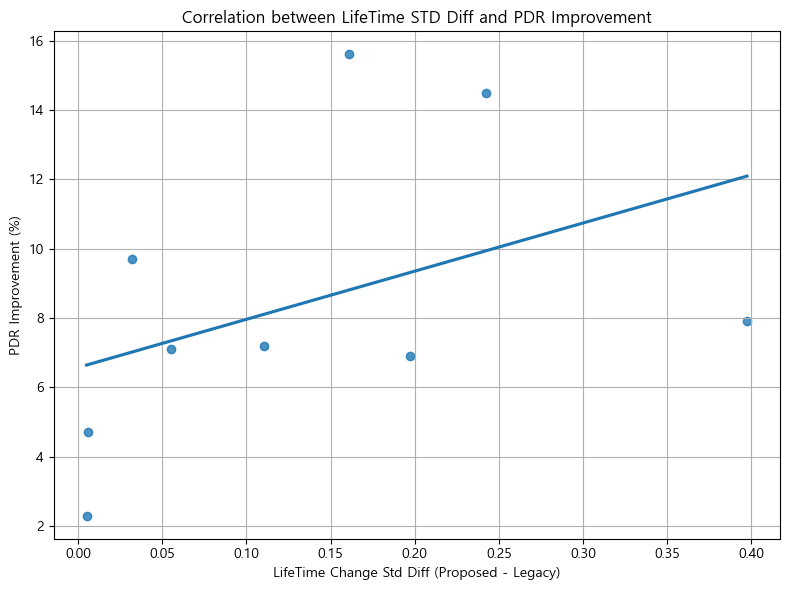

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

density_list = ['고밀도', '중밀도', '저밀도']
speed_list = ['저속', '중속', '고속']

density_translation = {
    "고밀도": "High Density (400 vehicles)",
    "중밀도": "Medium Density (300 vehicles)",
    "저밀도": "Low Density (200 vehicles)"
}

speed_translation = {
    "고속": "High Speed (30 km/h)",
    "중속": "Medium Speed (20 km/h)",
    "저속": "Low Speed (10 km/h)"
}

pdr_diff_matrix = np.array([
    [84.3 - 77.1, 87.4 - 72.9, 75.7 - 67.8],
    [87.9 - 81.0, 87.2 - 71.6, 83.0 - 73.3],
    [96.8 - 92.1, 95.9 - 88.8, 89.0 - 86.7]
])

data = []
for i, density in enumerate(density_list):
    for j, speed in enumerate(speed_list):
        df_filtered = df_result[(df_result['Density'] == density) & (df_result['Speed'] == speed)]
        df_proposed = df_filtered[df_filtered['Method'] == '제안']
        df_legacy = df_filtered[df_filtered['Method'] == '기존']

        if df_proposed.empty or df_legacy.empty:
            continue

        std_proposed = df_proposed['LifeTime_Change'].std()
        std_legacy = df_legacy['LifeTime_Change'].std()
        std_diff = std_proposed - std_legacy

        data.append({
            'Density': density_translation[density],
            'Speed': speed_translation[speed],
            'PDR_diff': pdr_diff_matrix[i][j],
            'LifeTime_STD_Diff': std_diff
        })

df_analysis = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.regplot(data=df_analysis, x='LifeTime_STD_Diff', y='PDR_diff', ci=None, marker='o')
plt.title("Correlation between LifeTime STD Diff and PDR Improvement")
plt.xlabel("LifeTime Change Std Diff (Proposed - Legacy)")
plt.ylabel("PDR Improvement (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


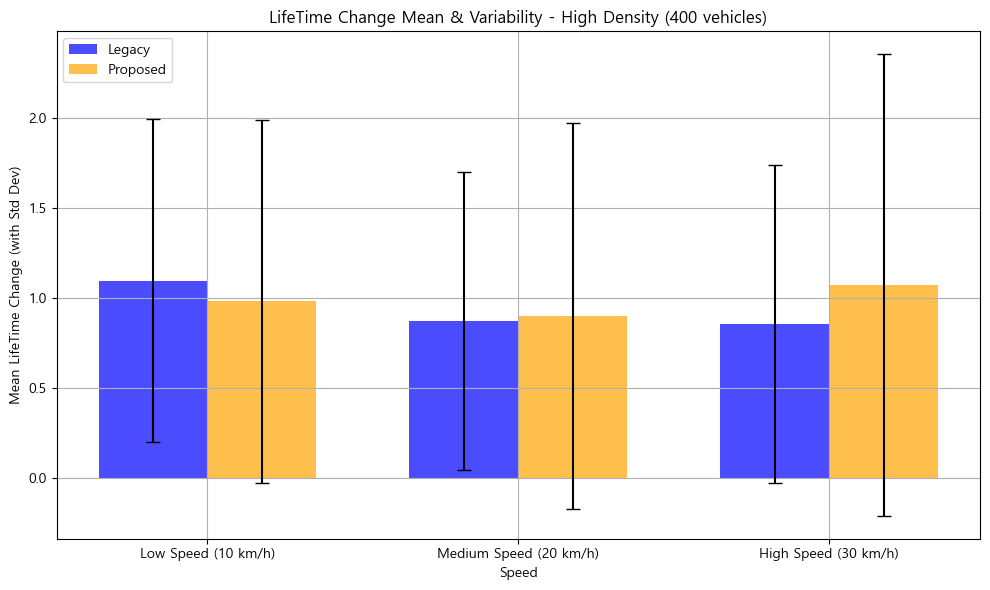

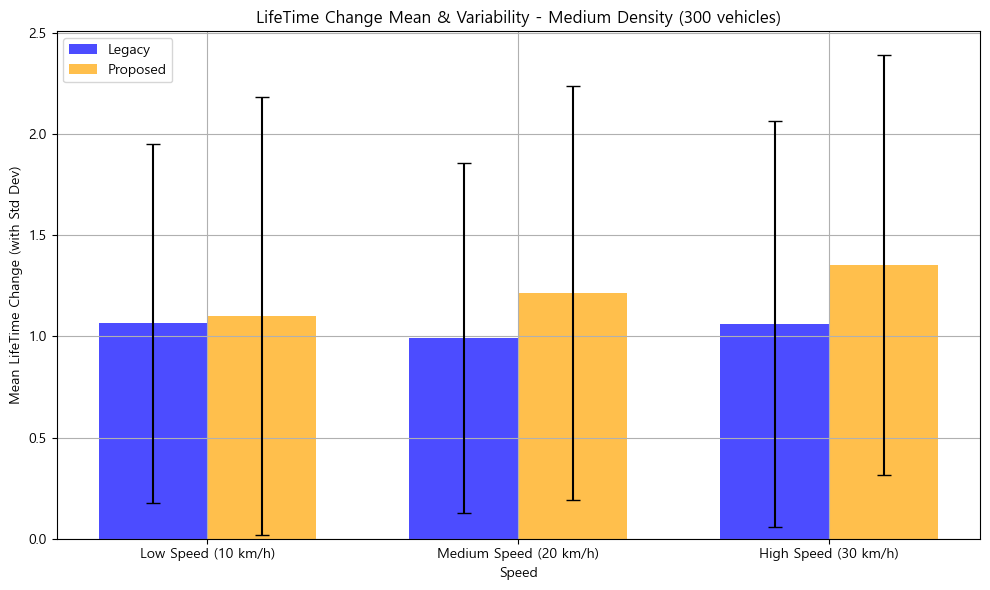

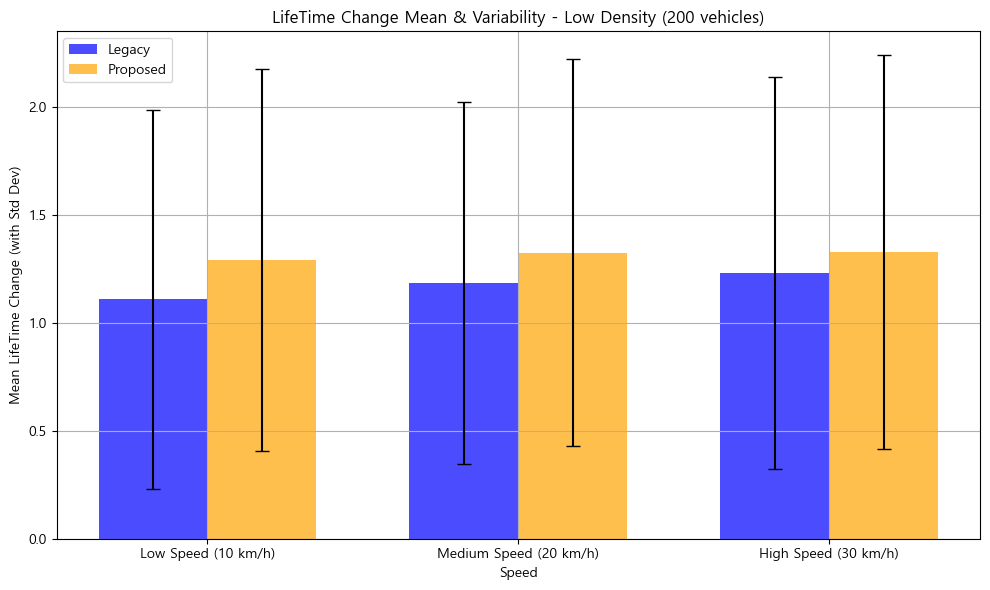

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# 밀도/속도 목록
density_list = ['고밀도', '중밀도', '저밀도']
speed_list = ['저속', '중속', '고속']

density_translation = {
    "고밀도": "High Density (400 vehicles)",
    "중밀도": "Medium Density (300 vehicles)",
    "저밀도": "Low Density (200 vehicles)"
}

speed_translation = {
    "고속": "High Speed (30 km/h)",
    "중속": "Medium Speed (20 km/h)",
    "저속": "Low Speed (10 km/h)"
}

for density in density_list:
    mean_legacy, mean_proposed = [], []
    std_legacy, std_proposed = [], []
    labels = []

    for speed in speed_list:
        df_filtered = df_result[(df_result['Density'] == density) & (df_result['Speed'] == speed)]
        df_legacy = df_filtered[df_filtered['Method'] == '기존']
        df_proposed = df_filtered[df_filtered['Method'] == '제안']

        if df_legacy.empty or df_proposed.empty:
            continue

        mean_legacy.append(df_legacy['LifeTime_Change'].mean())
        mean_proposed.append(df_proposed['LifeTime_Change'].mean())
        std_legacy.append(df_legacy['LifeTime_Change'].std())
        std_proposed.append(df_proposed['LifeTime_Change'].std())
        labels.append(speed_translation[speed])

    x = np.arange(len(labels))
    width = 0.35

    plt.figure(figsize=(10, 6))
    plt.bar(x - width/2, mean_legacy, width, yerr=std_legacy, capsize=5, label='Legacy', color='blue', alpha=0.7)
    plt.bar(x + width/2, mean_proposed, width, yerr=std_proposed, capsize=5, label='Proposed', color='orange', alpha=0.7)

    plt.xticks(x, labels)
    plt.xlabel("Speed")
    plt.ylabel("Mean LifeTime Change (with Std Dev)")
    plt.title(f"LifeTime Change Mean & Variability - {density_translation[density]}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [9]:
import os

base_dir = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/"
density_list = ['고밀도', '중밀도', '저밀도']
speed_list = ['고속', '중속', '저속']
mode_list = ['기존', '제안']

node_dict = {
    '고밀도': {'고속': [0, 4, 6, 7, 9, 10, 11, 17, 19, 20],
              '중속': [0, 4, 6, 7, 9, 10, 11, 17, 19, 20],
              '저속': [0, 4, 6, 7, 9, 10, 11, 17, 19, 20]},
    '중밀도': {'고속': [6, 7, 17, 18, 21, 22, 24, 26, 27, 29],
              '중속': [6, 7, 17, 18, 21, 22, 24, 26, 27, 29],
              '저속': [6, 7, 17, 18, 21, 22, 24, 26, 27, 29]},
    '저밀도': {'고속': [6, 7, 17, 18, 19, 21, 22, 24, 25, 26],
              '중속': [6, 7, 17, 18, 19, 21, 22, 24, 25, 26],
              '저속': [6, 7, 17, 18, 19, 21, 22, 24, 25, 26]}
}

results = []

for density in density_list:
    for speed in speed_list:
        for mode in mode_list:
            total_lines = 0
            for node in node_dict[density][speed]:
                log_path = os.path.join(base_dir, density, speed, mode, str(node), "aodv_routing_log.csv")
                if not os.path.exists(log_path):
                    continue
                with open(log_path, 'r', encoding='utf-8') as f:
                    lines = f.readlines()
                    total_lines += len(lines) - 1  # 헤더 제외

            results.append({
                "Density": density,
                "Speed": speed,
                "Method": mode,
                "Lifetime_Update_Count": total_lines
            })

# 결과 저장
df_update_count = pd.DataFrame(results)
df_update_count.to_csv("lifetime_update_count_summary.csv", index=False, encoding="utf-8-sig")
print("lifetime_update_count_summary.csv 저장 완료")


lifetime_update_count_summary.csv 저장 완료


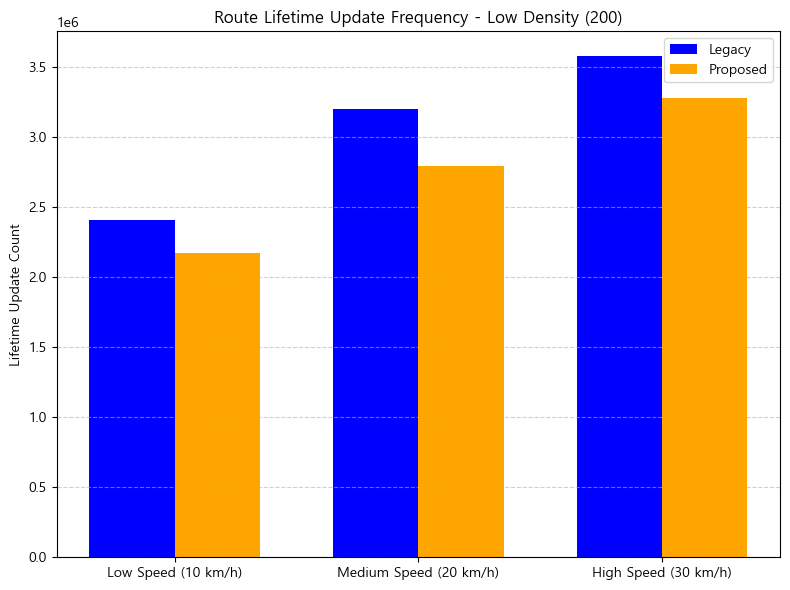

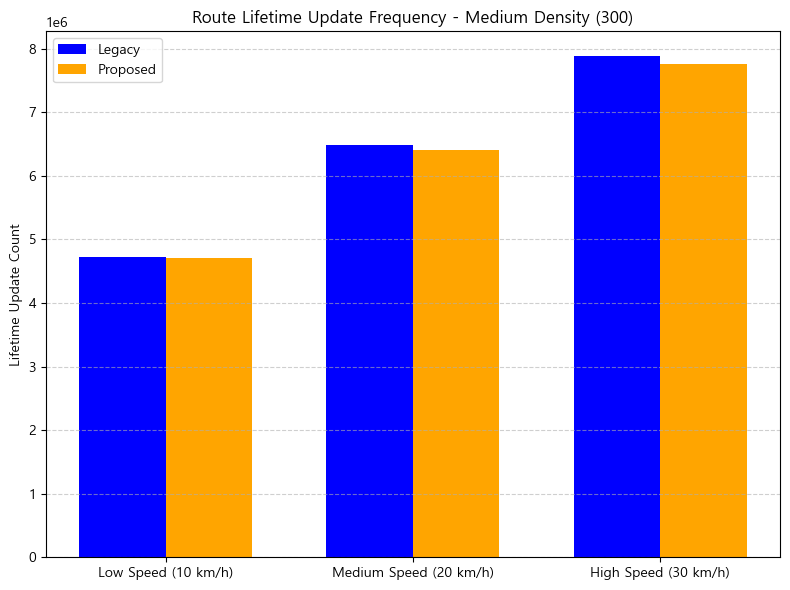

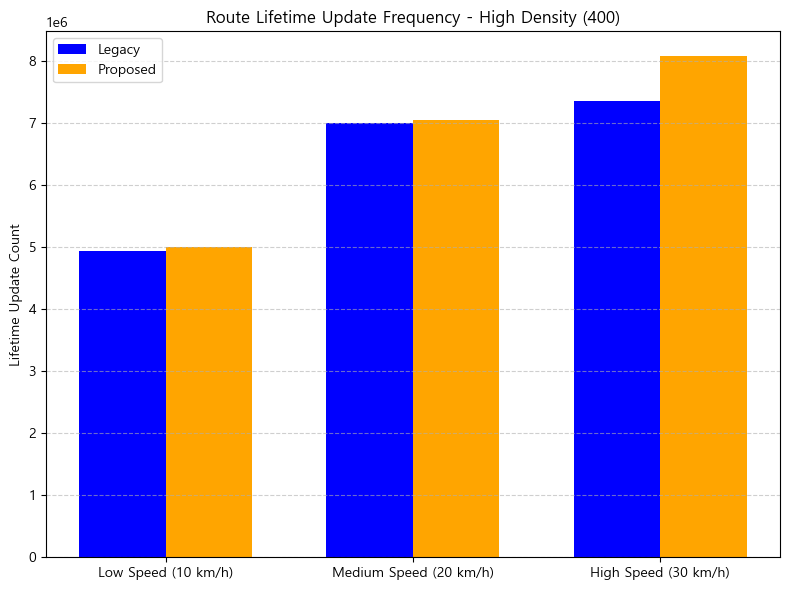

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 결과 CSV 불러오기
df = pd.read_csv("lifetime_update_count_summary.csv")

# 순서 고정
density_order = ['저밀도', '중밀도', '고밀도']
speed_order = ['저속', '중속', '고속']

density_translation = {
    "고밀도": "High Density (400)",
    "중밀도": "Medium Density (300)",
    "저밀도": "Low Density (200)"
}

speed_translation = {
    "저속": "Low Speed (10 km/h)",
    "중속": "Medium Speed (20 km/h)",
    "고속": "High Speed (30 km/h)"
}

# 시각화
for density in density_order:
    df_d = df[df['Density'] == density]
    legacy = []
    proposed = []
    labels = []

    for speed in speed_order:
        legacy_count = df_d[(df_d['Speed'] == speed) & (df_d['Method'] == '기존')]['Lifetime_Update_Count'].values
        proposed_count = df_d[(df_d['Speed'] == speed) & (df_d['Method'] == '제안')]['Lifetime_Update_Count'].values

        legacy.append(legacy_count[0] if len(legacy_count) > 0 else 0)
        proposed.append(proposed_count[0] if len(proposed_count) > 0 else 0)
        labels.append(speed_translation[speed])

    x = np.arange(len(labels))
    width = 0.35

    plt.figure(figsize=(8, 6))
    plt.bar(x - width/2, legacy, width, label='Legacy', color='blue')
    plt.bar(x + width/2, proposed, width, label='Proposed', color='orange')

    plt.xticks(x, labels)
    plt.ylabel("Lifetime Update Count")
    plt.title(f"Route Lifetime Update Frequency - {density_translation[density]}")
    plt.legend()
    plt.grid(True, axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
